In [27]:
%matplotlib inline
import glob
import os
import json
import pandas as pd
import re
from nilearn.image import math_img
from nilearn import plotting
import nibabel as nib
from shutil import copyfile

In [22]:
config_file = os.path.join(os.path.abspath(''), os.pardir, 'scripts', 'config.json')
with open(config_file) as json_data:
    config = json.load(json_data)

fmriprep_dir = config['fmriprep_dir']

In [23]:
os.listdir(fmriprep_dir)
glob_str = os.path.join(fmriprep_dir, 'sub-*', 'func', '*_confounds.tsv')
counfound_files = glob.glob(glob_str)

to_check = []

max_fd = dict()
for confound_file in counfound_files:
    df = pd.read_csv(confound_file, delimiter='\t')
    fd = df['FramewiseDisplacement']
    
    if (any(fd>2)):
        m = re.search('(sub-\d+_task-MGT_run-\d+)', confound_file)
        if m:
            sub_run = m.group(1)
        else:
            raise Exception('sub_run not found in ' + confound_file)
        to_check.append(sub_run)
        max_fd[sub_run] = max(fd[1:])

<>:13: DeprecationWarning: invalid escape sequence \d


In [14]:
max_fd

{'sub-013_task-MGT_run-04': 2.1845109000000003,
 'sub-016_task-MGT_run-01': 2.7483839,
 'sub-016_task-MGT_run-03': 2.836432,
 'sub-016_task-MGT_run-04': 3.43058395,
 'sub-018_task-MGT_run-01': 3.8531400999999996,
 'sub-018_task-MGT_run-02': 3.0006321,
 'sub-018_task-MGT_run-03': 2.7727626,
 'sub-018_task-MGT_run-04': 3.6814605000000005,
 'sub-022_task-MGT_run-02': 2.28111495,
 'sub-026_task-MGT_run-01': 2.59087405,
 'sub-026_task-MGT_run-04': 3.05961768,
 'sub-030_task-MGT_run-01': 10.3124965,
 'sub-030_task-MGT_run-02': 12.345809999999995,
 'sub-030_task-MGT_run-03': 12.950940600000004,
 'sub-030_task-MGT_run-04': 9.3655225,
 'sub-036_task-MGT_run-02': 3.2467148,
 'sub-037_task-MGT_run-03': 2.12047,
 'sub-068_task-MGT_run-02': 2.3018363999999996,
 'sub-088_task-MGT_run-02': 2.32523075,
 'sub-088_task-MGT_run-03': 4.347616400000001,
 'sub-088_task-MGT_run-04': 2.3417155,
 'sub-089_task-MGT_run-03': 4.0320089,
 'sub-093_task-MGT_run-04': 2.7954546000000002,
 'sub-100_task-MGT_run-02': 2

In [24]:
qc_dir = os.path.join(config['output_dir'], 'qc')
if not os.path.isdir(qc_dir):
    os.mkdir(qc_dir)

In [20]:
qc_dir

'/Users/camaumet/Documents/NARPS_out/qc'

sub-013_task-MGT_run-04


/anaconda3/envs/narps/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


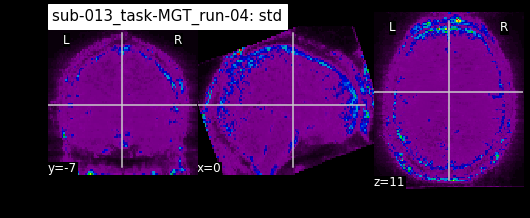

sub-016_task-MGT_run-01


In [ ]:
%matplotlib inline
for sub_run in to_check:
    print(sub_run)
    glob_str = os.path.join(fmriprep_dir, 'sub-*', 'func', sub_run + '*_space-MNI152NLin2009cAsym_preproc.nii.gz')
    fmri_file = glob.glob(glob_str)[0]
    copyfile(fmri_file, os.path.join(qc_dir, os.path.basename(fmri_file)))
    
    fmri_img = nib.load(fmri_file)
    std_img = math_img("np.std(img, axis=3)", img=fmri_img)
    std_img.to_filename(os.path.join(qc_dir, sub_run + '_std.nii.gz'))
    plotting.plot_epi(std_img, title=sub_run + ': std')
    plotting.show()

In [9]:
len(to_check)

35